## DSCI 552 HW2
### Name: Yihao Zheng
### Github Username: YihaoJackZheng
### USC ID: 5604513311

#### 1. Vertebral Column Data Set
##### (a): Download the Vertebral Column Data Set
##### (b):

###### i:

In [7]:
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import DistanceMetric
import math
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure
dataset = arff.loadarff('…/data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(dataset[0])
df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes
df['class'].replace([0,1],[1, 0], inplace=True)
df

FileNotFoundError: [Errno 2] No such file or directory: '…/data/vertebral_column_data/column_2C_weka.arff'

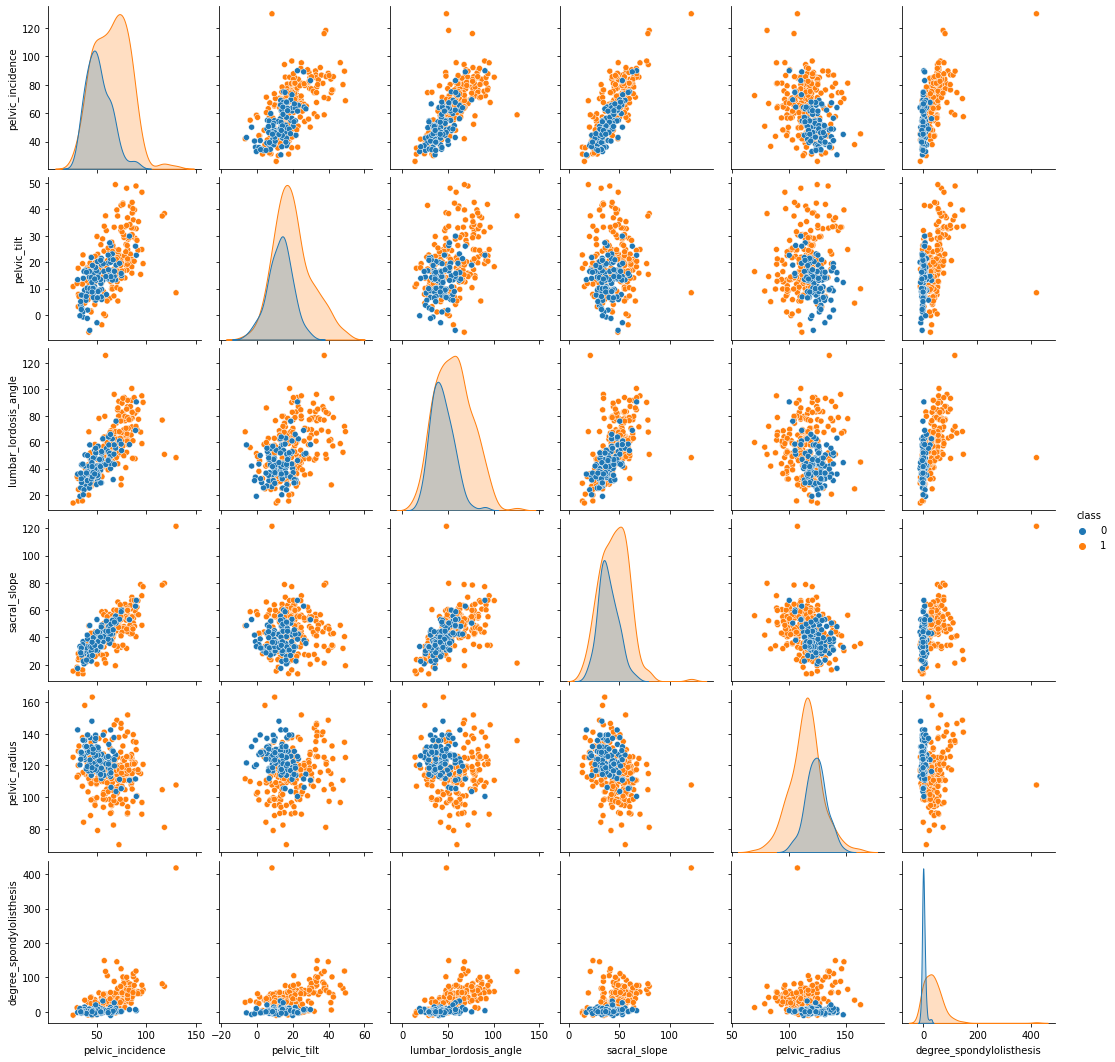

In [2]:
sns.pairplot(df, hue="class")

###### ii:

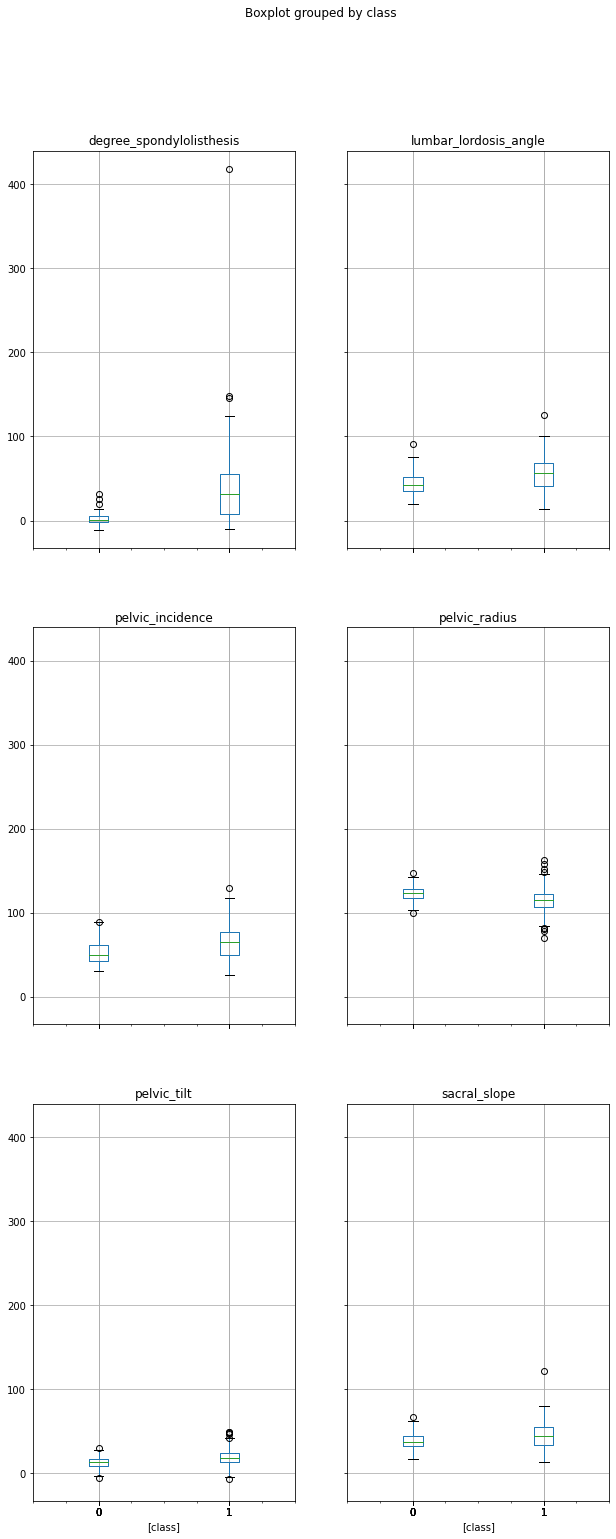

In [3]:
boxplot = df.boxplot(by='class',figsize = (10,25))

###### iii:

In [4]:
NO_train = df[210:280]
NO_test = df[280:310]
AB_train = df[0:140]
AB_test = df[140:210]
frames = [AB_train,NO_train]
Train = pd.concat(frames)
frames2 = [AB_test,NO_test]
Test = pd.concat(frames2)
X_train = Train[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope'
                ,'pelvic_radius','degree_spondylolisthesis']]
Y_train = Train['class']
X_test = Test[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope'
                ,'pelvic_radius','degree_spondylolisthesis']]
Y_test = Test['class']

##### (c):
###### i.

In [5]:
n = []
i = 211
train_mse = []
test_mse = []
while i >= 2:
    i = i - 3
    n.append(i)
for i in n:
    knn = KNeighborsClassifier(n_neighbors = i,metric = 'euclidean')
    knn.fit(X_train,Y_train)
    ytrain_pre = knn.predict(X_train)
    train_mse.append(mean_squared_error(Y_train,ytrain_pre))
    ytest_pred = knn.predict(X_test)
    test_mse.append(mean_squared_error(Y_test, ytest_pred))

###### ii.

Text(0, 0.5, 'mean squared error')

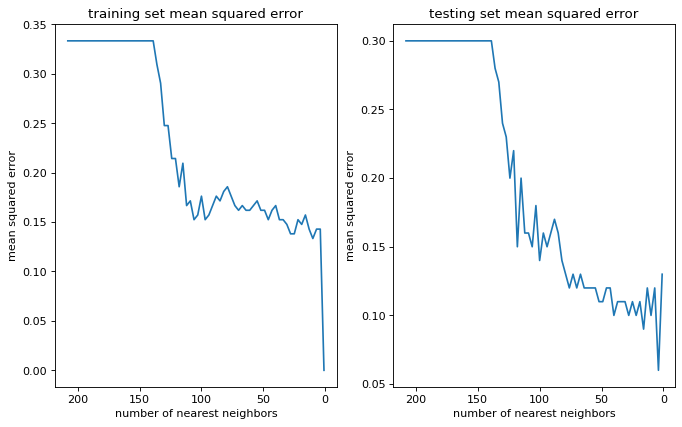

In [6]:
figure(figsize=(10, 6), dpi=80)
plt.subplot(1,2,1)
plt.plot(n,train_mse)
ax = plt.gca()
ax.invert_xaxis()
plt.title('training set mean squared error')
plt.xlabel('number of nearest neighbors')
plt.ylabel('mean squared error')
plt.subplot(1,2,2)
plt.plot(n,test_mse)
ax = plt.gca()
ax.invert_xaxis()
plt.title('testing set mean squared error')
plt.xlabel('number of nearest neighbors')
plt.ylabel('mean squared error')

In [7]:
min_train = min(train_mse)
print("Minimum training MSE:" ,min_train)

Minimum training MSE: 0.0


In [8]:
min_test= min(test_mse)
print("Minimum Error is:", min_test)    
index = test_mse.index(min_test)
k = 208 - index * 3
print("Optimal K =", k)

Minimum Error is: 0.06
Optimal K = 4


(0.0, 15.0, 0.05, 0.3)

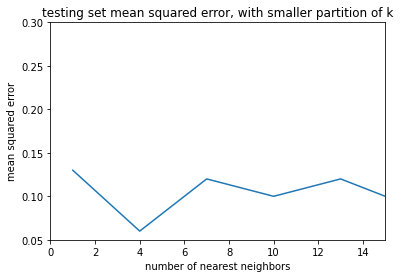

In [9]:
plt.plot(n,test_mse)
plt.title('testing set mean squared error, with smaller partition of k')
plt.xlabel('number of nearest neighbors')
plt.ylabel('mean squared error')
plt.axis([0, 15, 0.05, 0.3])

##### The best k should be 4. Since at k=4, we can get the lowest MSE. Also we look at the zoom in mean squared error plot, at k = 4, the MSE dropped dramatically and then raised again. 

In [10]:
knn = KNeighborsClassifier(n_neighbors = 4,metric = 'euclidean')
knn.fit(X_train,Y_train)
ytest_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=ytest_pred)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

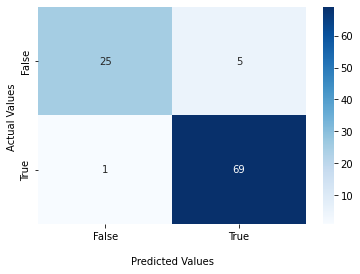

In [11]:
ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [12]:
f1_score = f1_score(Y_test, ytest_pred)
f1_score

0.9583333333333333

##### The true negative rate is 96.154%. The true positive rate is 93.243. The precision is 94%. The F1-score is 0.9583

##### iii

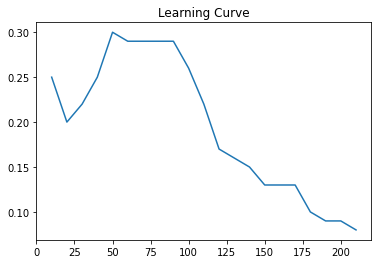

In [13]:
i = 0
n = []
while i <= 200:
    i = i + 10
    n.append(i)
min_error = []
for i in n:
    NO_train_new = NO_train[:math.trunc(i/3)]
    #NO_test_new = df[210 + math.trunc(i/3):310]
    AB_train_new = AB_train[:i-math.trunc(i/3)]
    #AB_test_new = df[i-math.trunc(i/3):210]
    frames = [AB_train_new,NO_train_new]
    #frames1 = [AB_test_new,NO_test_new]
    #Test = pd.concat(frames1)
    Train = pd.concat(frames)
    #X_test = Test[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope'
                #,'pelvic_radius','degree_spondylolisthesis']]
    #Y_test = Test['class']
    X_train = Train[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope'
                ,'pelvic_radius','degree_spondylolisthesis']]
    Y_train = Train['class']
    k = []
    j = 1
    test_mse = []
    while j < i-3:
        k.append(j)
        j = j+5
    for m in k:
        knn = KNeighborsClassifier(n_neighbors = m,metric = 'euclidean')
        knn.fit(X_train,Y_train)
        ytest_pre = knn.predict(X_test)
        test_mse.append(mean_squared_error(Y_test,ytest_pre))
    min_error.append(min(test_mse))
plt.title('Learning Curve')
plt.plot(n,min_error)

##### (d)

###### iA

In [14]:
NO_train = df[210:280]
NO_test = df[280:310]
AB_train = df[0:140]
AB_test = df[140:210]
frames = [AB_train,NO_train]
Train = pd.concat(frames)
frames2 = [AB_test,NO_test]
Test = pd.concat(frames2)
test_mse = []
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors = k,metric = 'manhattan')
    knn.fit(X_train,Y_train)
    ytest_pre = knn.predict(X_test)
    test_mse.append(mean_squared_error(Y_test,ytest_pre))
min_test= min(test_mse)
print("Minimum Error is:", min_test)    
index = test_mse.index(min_test)
k = 1 + index*5
print("Best k:",k)

Minimum Error is: 0.11
Best k: 1


###### iB

In [15]:
i = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
p = []
test_mse = []
for i in i:
    p.append(math.log(i,10))
for m in p:
    knn = KNeighborsClassifier(n_neighbors = 1,metric = 'manhattan', p = i)
    knn.fit(X_train,Y_train)
    ytest_pre = knn.predict(X_test)
    test_mse.append(mean_squared_error(Y_test,ytest_pre)) 
min_test = min(test_mse)
print("Minimum Error is:", min_test)    
index = test_mse.index(min_test)
p = 0.1 + index * 0.1
print("Best p:",p)

Minimum Error is: 0.11
Best p: 0.1


###### iC

In [16]:
test_mse = []
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors = k,metric = 'chebyshev')
    knn.fit(X_train,Y_train)
    ytest_pre = knn.predict(X_test)
    test_mse.append(mean_squared_error(Y_test,ytest_pre))
min_test= min(test_mse)
print("Minimum Error is:", min_test)    
index = test_mse.index(min_test)
k = 1 + index*5
print("Best k:",k)

Minimum Error is: 0.08
Best k: 16


##### ii

In [17]:
test_mse=[]
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors = k,metric = 'mahalanobis',
                              metric_params={'VI': np.cov(X_train,rowvar=False)})
    knn.fit(X_train,Y_train)
    ytest_pre = knn.predict(X_test)
    test_mse.append(mean_squared_error(Y_test,ytest_pre))
min_test= min(test_mse)
print("Minimum Error is:", min_test)    
index = test_mse.index(min_test)
k = 1 + index*5
print("Best k:",k)

Minimum Error is: 0.08
Best k: 6


##### e

In [18]:
test_mse = []
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean',weights = 'distance')
    knn.fit(X_train,Y_train)
    ytest_pre = knn.predict(X_test)
    test_mse.append(mean_squared_error(Y_test,ytest_pre))
min_test= min(test_mse)
print("Weighted decision with Euclidean distance")
print("Minimum Error is:", min_test)    
index = test_mse.index(min_test)
k = 1 + index*5
print("Best k:",k)

Weighted decision with Euclidean distance
Minimum Error is: 0.1
Best k: 6


In [19]:
test_mse = []
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors = k,metric = 'manhattan',weights = 'distance')
    knn.fit(X_train,Y_train)
    ytest_pre = knn.predict(X_test)
    test_mse.append(mean_squared_error(Y_test,ytest_pre))
min_test= min(test_mse)
print("Weighted decision with Manhattan distance")
print("Minimum Error is:", min_test)    
index = test_mse.index(min_test)
k = 1 + index*5
print("Best k:",k)

Weighted decision with Manhattan distance
Minimum Error is: 0.1
Best k: 26


In [20]:
test_mse = []
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors = k,metric = 'chebyshev',weights = 'distance')
    knn.fit(X_train,Y_train)
    ytest_pre = knn.predict(X_test)
    test_mse.append(mean_squared_error(Y_test,ytest_pre))
min_test= min(test_mse)
print("Weighted decision with Chbyshev distance")
print("Minimum Error is:", min_test)    
index = test_mse.index(min_test)
k = 1 + index*5
print("Best k:",k)

Weighted decision with Chbyshev distance
Minimum Error is: 0.11
Best k: 16


##### f

###### The lowest training MSE I obtained from this assignment is 0.00.